# 🎮 Hardware Performance Analysis: Exploratory Data Analysis (EDA)

**Objective:** To investigate the distribution of PC hardware specifications and gaming performance (FPS) to prepare a clean dataset for Machine Learning.

**Key Goals:**
1.  **Identify Outliers:** Detect "glitch" benchmarks.
2.  **Analyze Distributions:** Determine if hardware specs (Cores, VRAM) are skewed.
3.  **Formulate Cleaning Strategy:** Decide between dropping, capping, or transforming irregular data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fps_benchmark.csv")
df.head()

,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,...,GpuShaderModel,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GpuVulkan,GameName,GameResolution,GameSetting,FPS
0,b'Intel Core i9-9900K',8.0,16.0,100.0,512.0,2048.0,16.0,NaN,3600.0,36.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',225.3
1,b'Intel Core i7-9700K',8.0,8.0,100.0,512.0,2048.0,12.0,NaN,3600.0,36.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',223.3
2,b'Intel Core i7-8700K',6.0,12.0,100.0,384.0,1536.0,12.0,NaN,3700.0,37.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',207.3
3,b'Intel Core i7-7700K',4.0,8.0,100.0,256.0,1024.0,8.0,NaN,4200.0,42.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',201.3
4,b'Intel Core i5-9400F',6.0,6.0,100.0,384.0,1536.0,9.0,NaN,2900.0,29.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',199.2


In [3]:
df.shape

(24624, 44)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CpuNumberOfCores,24624.0,6.315789e+00,2.078823e+00,2.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
CpuNumberOfThreads,24624.0,1.084211e+01,5.203982e+00,4.000000e+00,6.000000e+00,1.200000e+01,1.600000e+01,2.400000e+01
CpuBaseClock,24624.0,1.000000e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
CpuCacheL1,24624.0,5.153684e+02,2.335216e+02,1.280000e+02,3.840000e+02,5.120000e+02,5.760000e+02,1.152000e+03
CpuCacheL2,24624.0,2.506105e+03,1.398698e+03,5.120000e+02,1.536000e+03,2.048000e+03,3.072000e+03,6.144000e+03
CpuCacheL3,24624.0,1.821053e+01,1.422991e+01,3.000000e+00,9.000000e+00,1.600000e+01,3.200000e+01,6.400000e+01
CpuDieSize,11664.0,1.264444e-04,5.863719e-05,7.400000e-05,7.400000e-05,7.400000e-05,1.920000e-04,1.920000e-04
CpuFrequency,24624.0,3.589474e+03,3.177199e+02,2.800000e+03,3.400000e+03,3.600000e+03,3.800000e+03,4.200000e+03
CpuMultiplier,24624.0,3.589474e+01,3.177199e+00,2.800000e+01,3.400000e+01,3.600000e+01,3.800000e+01,4.200000e+01
CpuProcessSize,24624.0,1.194737e+01,3.017095e+00,7.000000e+00,7.000000e+00,1.400000e+01,1.400000e+01,1.400000e+01


In [5]:
df.isnull().sum()

,0
CpuName,0
CpuNumberOfCores,0
CpuNumberOfThreads,0
CpuBaseClock,0
CpuCacheL1,0
CpuCacheL2,0
CpuCacheL3,0
CpuDieSize,12960
CpuFrequency,0
CpuMultiplier,0


## Drop Empty Column
Remove the 'GpuNumberOfExecutionUnits' column from the DataFrame as it contains all null values.


In [6]:
df.drop(columns=['GpuNumberOfExecutionUnits'], inplace=True)
df.head()

,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,...,GpuShaderModel,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GpuVulkan,GameName,GameResolution,GameSetting,FPS
0,b'Intel Core i9-9900K',8.0,16.0,100.0,512.0,2048.0,16.0,NaN,3600.0,36.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',225.3
1,b'Intel Core i7-9700K',8.0,8.0,100.0,512.0,2048.0,12.0,NaN,3600.0,36.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',223.3
2,b'Intel Core i7-8700K',6.0,12.0,100.0,384.0,1536.0,12.0,NaN,3700.0,37.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',207.3
3,b'Intel Core i7-7700K',4.0,8.0,100.0,256.0,1024.0,8.0,NaN,4200.0,42.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',201.3
4,b'Intel Core i5-9400F',6.0,6.0,100.0,384.0,1536.0,9.0,NaN,2900.0,29.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',199.2


## Impute missing values
 imputing missing values in 'CpuDieSize', 'CpuNumberOfTransistors', and 'GpuNumberOfComputeUnits' with their respective medians.

In [7]:
median_cpu_die_size = df['CpuDieSize'].median()
median_cpu_num_transistors = df['CpuNumberOfTransistors'].median()
median_gpu_num_compute_units = df['GpuNumberOfComputeUnits'].median()

df['CpuDieSize'] = df['CpuDieSize'].fillna(median_cpu_die_size)
df['CpuNumberOfTransistors'] = df['CpuNumberOfTransistors'].fillna(median_cpu_num_transistors)
df['GpuNumberOfComputeUnits'] = df['GpuNumberOfComputeUnits'].fillna(median_gpu_num_compute_units)

print("Missing values imputed with medians.")

df.isnull().sum()

Missing values imputed with medians.


,0
CpuName,0
CpuNumberOfCores,0
CpuNumberOfThreads,0
CpuBaseClock,0
CpuCacheL1,0
CpuCacheL2,0
CpuCacheL3,0
CpuDieSize,0
CpuFrequency,0
CpuMultiplier,0


## Summary:

### Data Analysis Key Findings
*   The 'GpuNumberOfExecutionUnits' column, which contained all null values, was successfully dropped from the DataFrame.
*   Missing values in 'CpuDieSize', 'CpuNumberOfTransistors', and 'GpuNumberOfComputeUnits' were imputed using their respective median values.
*   After the imputation, all targeted columns ('CpuDieSize', 'CpuNumberOfTransistors', and 'GpuNumberOfComputeUnits') now have 0 null entries, indicating successful missing value handling.

### Insights
*   Ensure that the chosen imputation method (median) is appropriate for the distribution of these specific columns; if not, alternative imputation strategies might be explored.
*   Document the specific missing value handling steps in the data preprocessing pipeline to ensure reproducibility and clarity for future analyses.


***Ensuring that the chosen imputation method (median) is appropriate for the distribution of these specific columns; if not, alternative imputation strategies might be explored.***

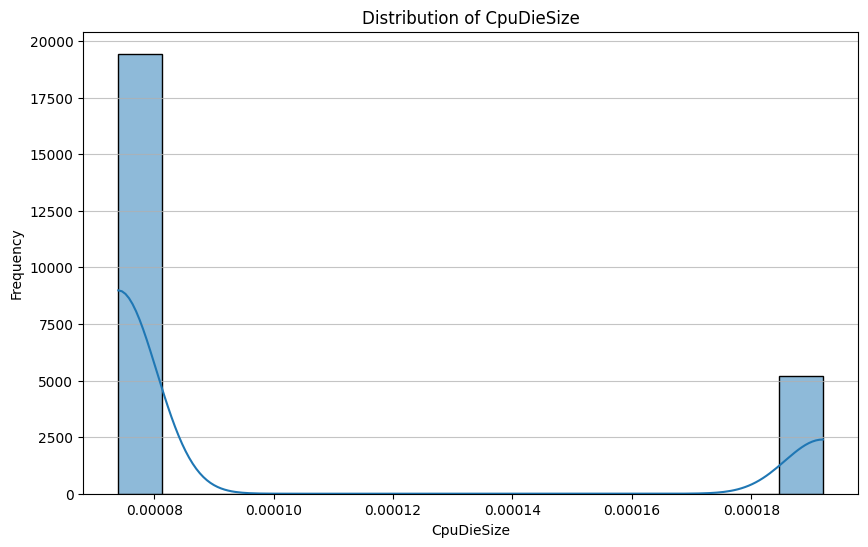

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CpuDieSize'], kde=True)
plt.title('Distribution of CpuDieSize')
plt.xlabel('CpuDieSize')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**The histogram for 'CpuDieSize' reveals a bimodal distribution, meaning it has two distinct peaks: a prominent one around 0.00008 and another smaller one near 0.00018.**

**This distribution is not symmetric and indicates that there are two main groups of CPU die sizes within your dataset. Since the distribution is not unimodal and symmetric, using the median for imputation is generally a better choice than using the mean, as the mean might fall in a less representative area between the two peaks.**

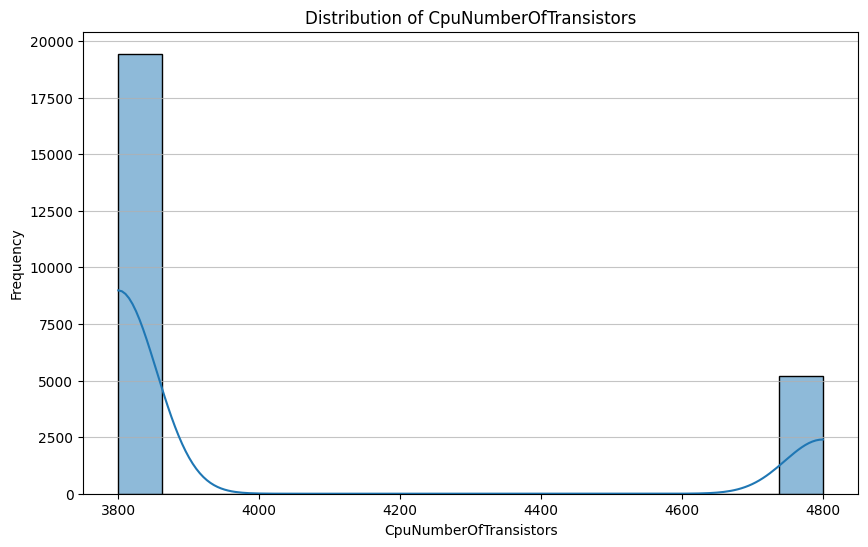

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CpuNumberOfTransistors'], kde=True)
plt.title('Distribution of CpuNumberOfTransistors')
plt.xlabel('CpuNumberOfTransistors')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**The histogram for 'CpuNumberOfTransistors' reveals a bimodal distribution, meaning it has two distinct peaks: a prominent one around 3800 and another smaller one near 4800.**

**This distribution is not symmetric and indicates that there are two main groups of Cpu Number Of Transistors within your dataset. Since the distribution is not unimodal and symmetric, using the median for imputation is generally a better choice than using the mean, as the mean might fall in a less representative area between the two peaks.**

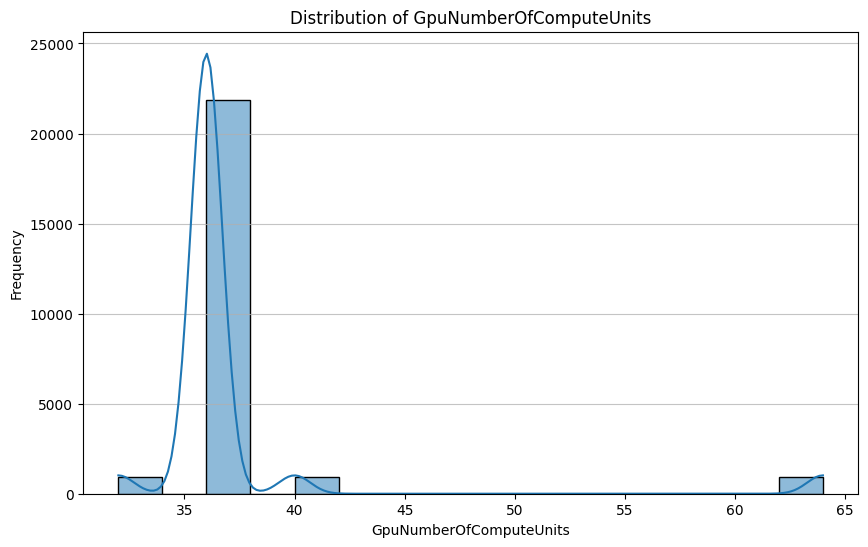

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['GpuNumberOfComputeUnits'], kde=True)
plt.title('Distribution of GpuNumberOfComputeUnits')
plt.xlabel('GpuNumberOfComputeUnits')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Observing a highly multimodal distribution with a very dominant peak around 32-37 (specifically, 36.0 being the median), and smaller peaks around 40 and 64. The vast majority of the data points are concentrated around 36.**

**Since the distribution is not symmetric and has distinct clusters, using the median (36.0) for imputation is highly appropriate here.**

### Separate Numerical and Categorical Columns

To effectively process data, especially for machine learning models, it's often necessary to treat numerical and categorical features differently. This step identifies and segregates columns based on their data types.

In [11]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:")
print(numerical_cols)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1', 'CpuCacheL2', 'CpuCacheL3', 'CpuDieSize', 'CpuFrequency', 'CpuMultiplier', 'CpuProcessSize', 'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuBandwidth', 'GpuBaseClock', 'GpuBoostClock', 'GpuNumberOfComputeUnits', 'GpuDieSize', 'GpuFP32Performance', 'GpuMemoryBus', 'GpuMemorySize', 'GpuPixelRate', 'GpuProcessSize', 'GpuNumberOfROPs', 'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs', 'GpuTextureRate', 'GpuNumberOfTransistors', 'GameResolution', 'FPS']

Categorical Columns:
['CpuName', 'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture', 'GpuBus.interface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting']


In this code:
*   `df.select_dtypes(include=['int64', 'float64'])` selects all columns with integer or float data types.
*   `.columns.tolist()` extracts the names of these selected columns into a list.
*   The same process is then repeated for `object` and `category` dtypes to get the categorical columns.

This provides a clear separation of your dataset's features, which is a foundational step for further preprocessing like encoding categorical variables or scaling numerical ones.

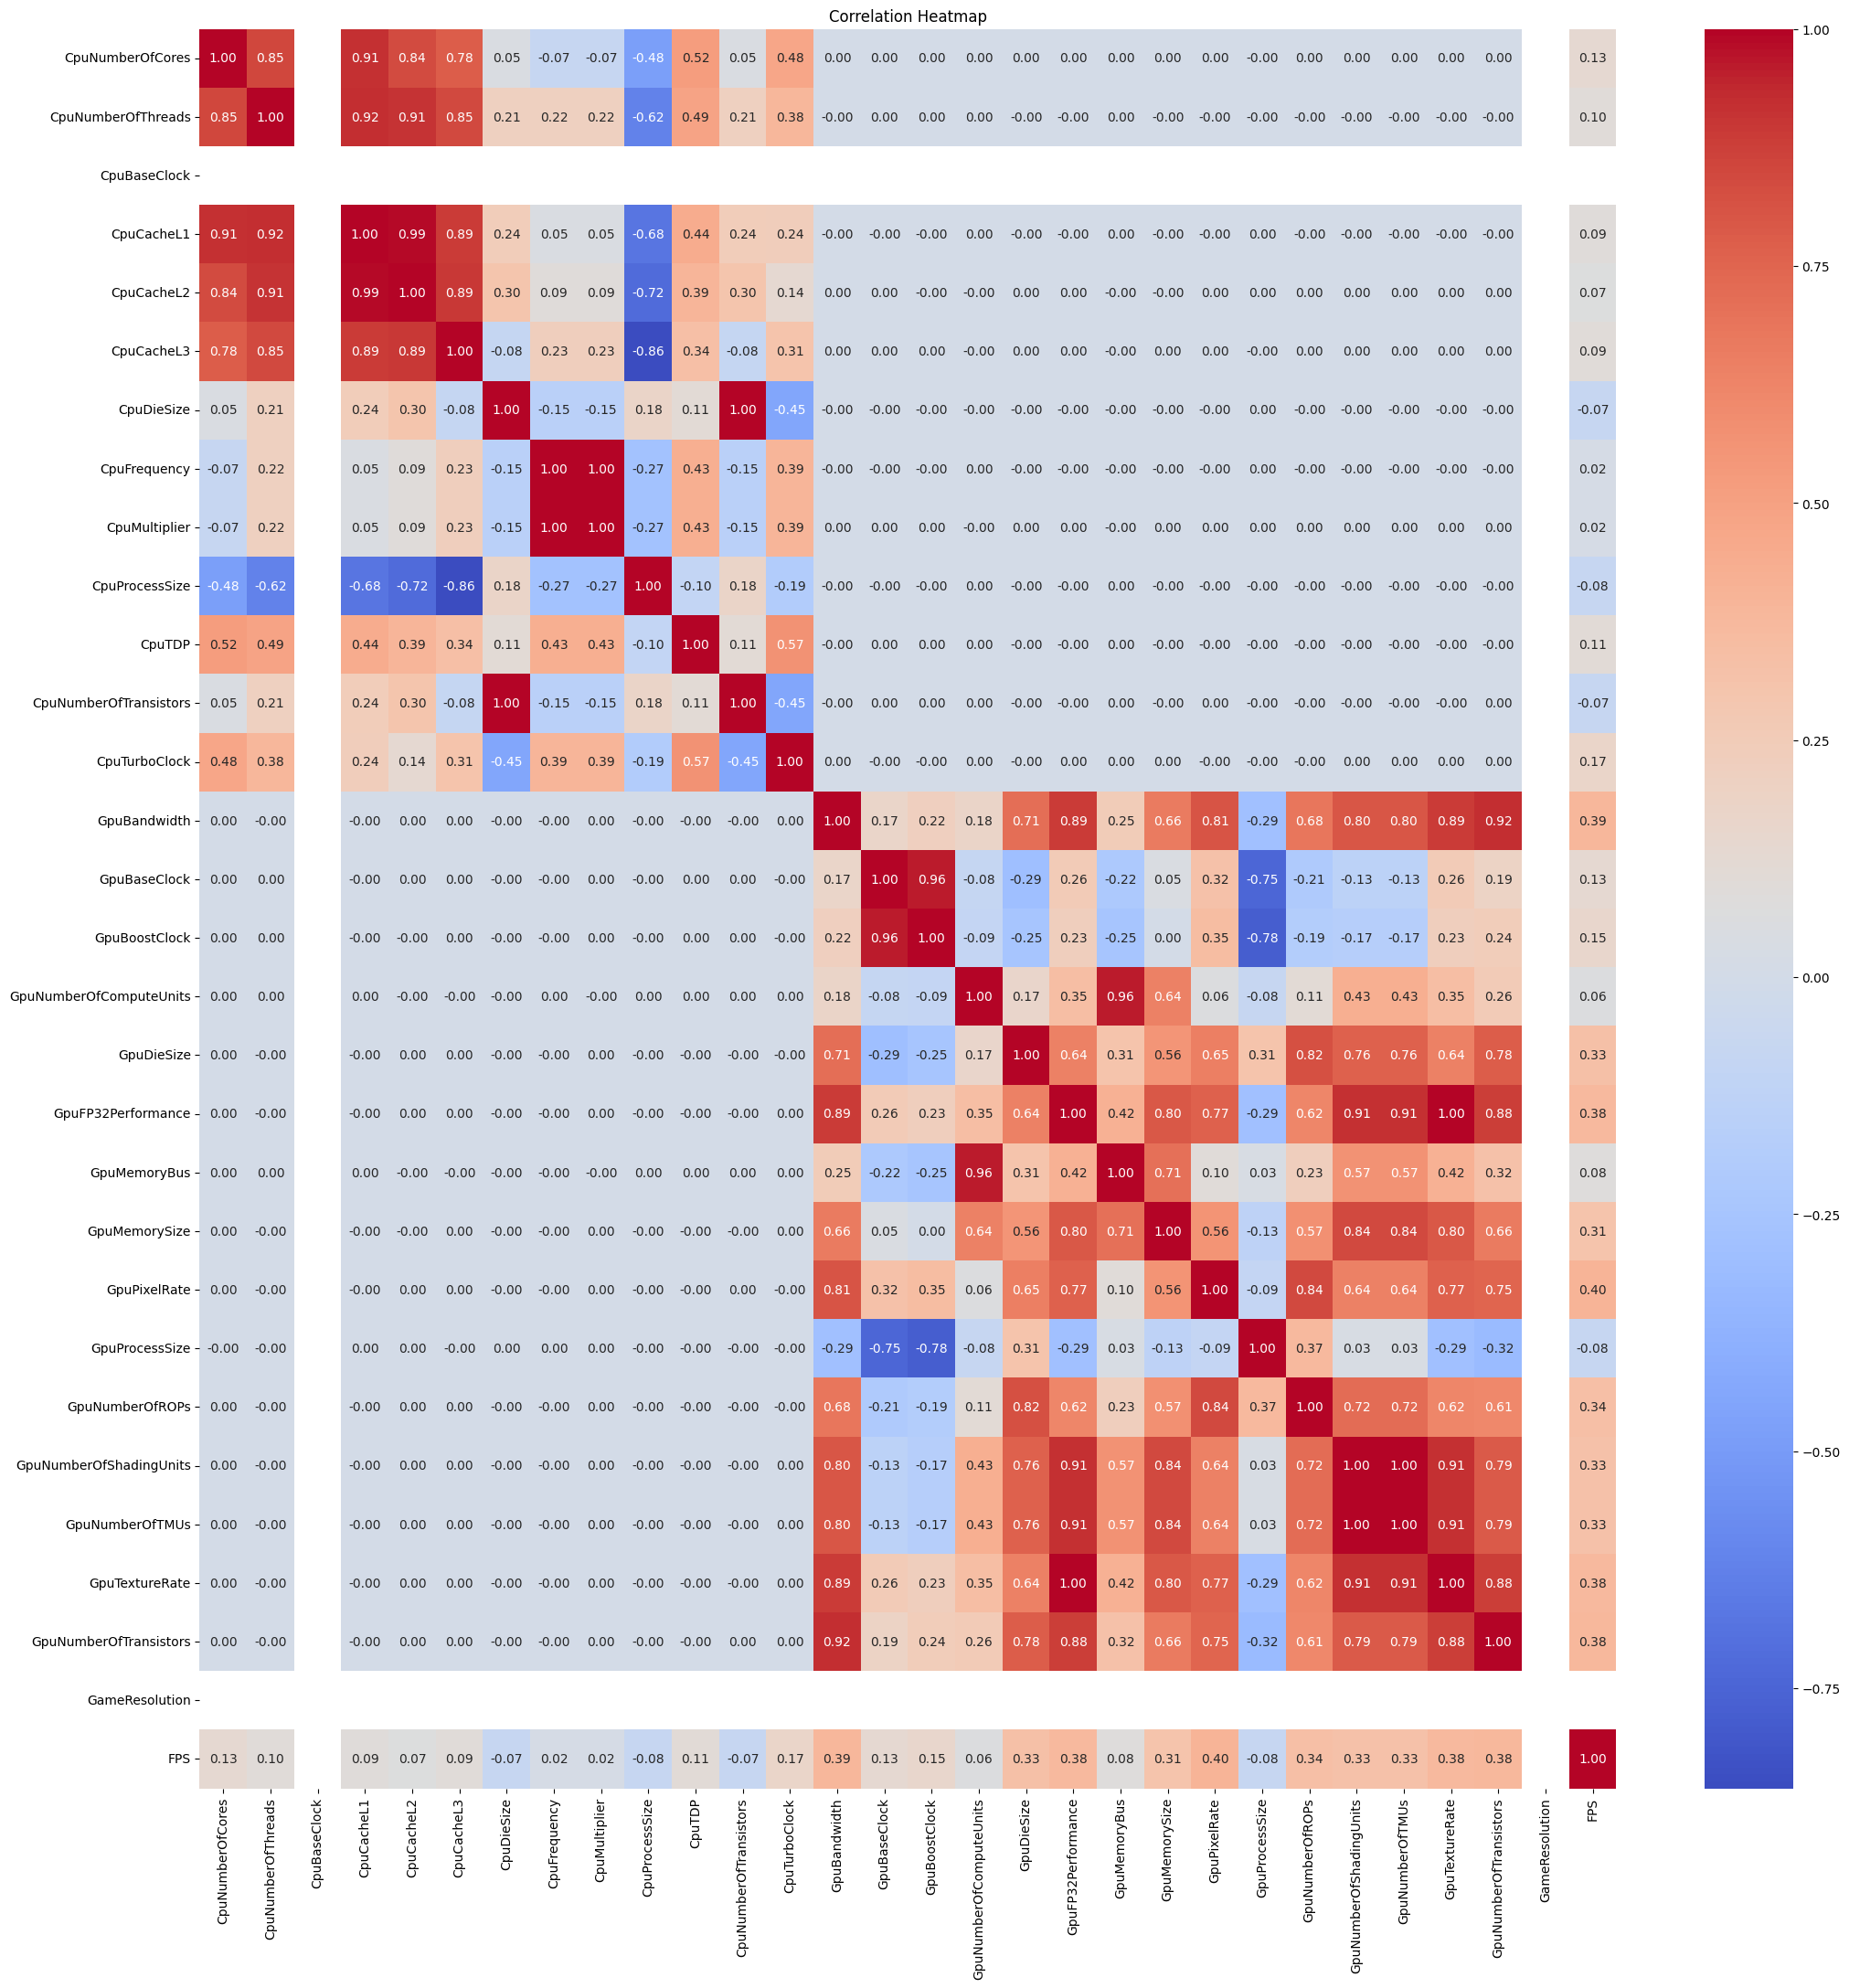

In [12]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**For 'GameResolution', every entry is 1080.0, and for 'CpuBaseClock', every entry is 100.0. This means these columns have no variability or variance.**

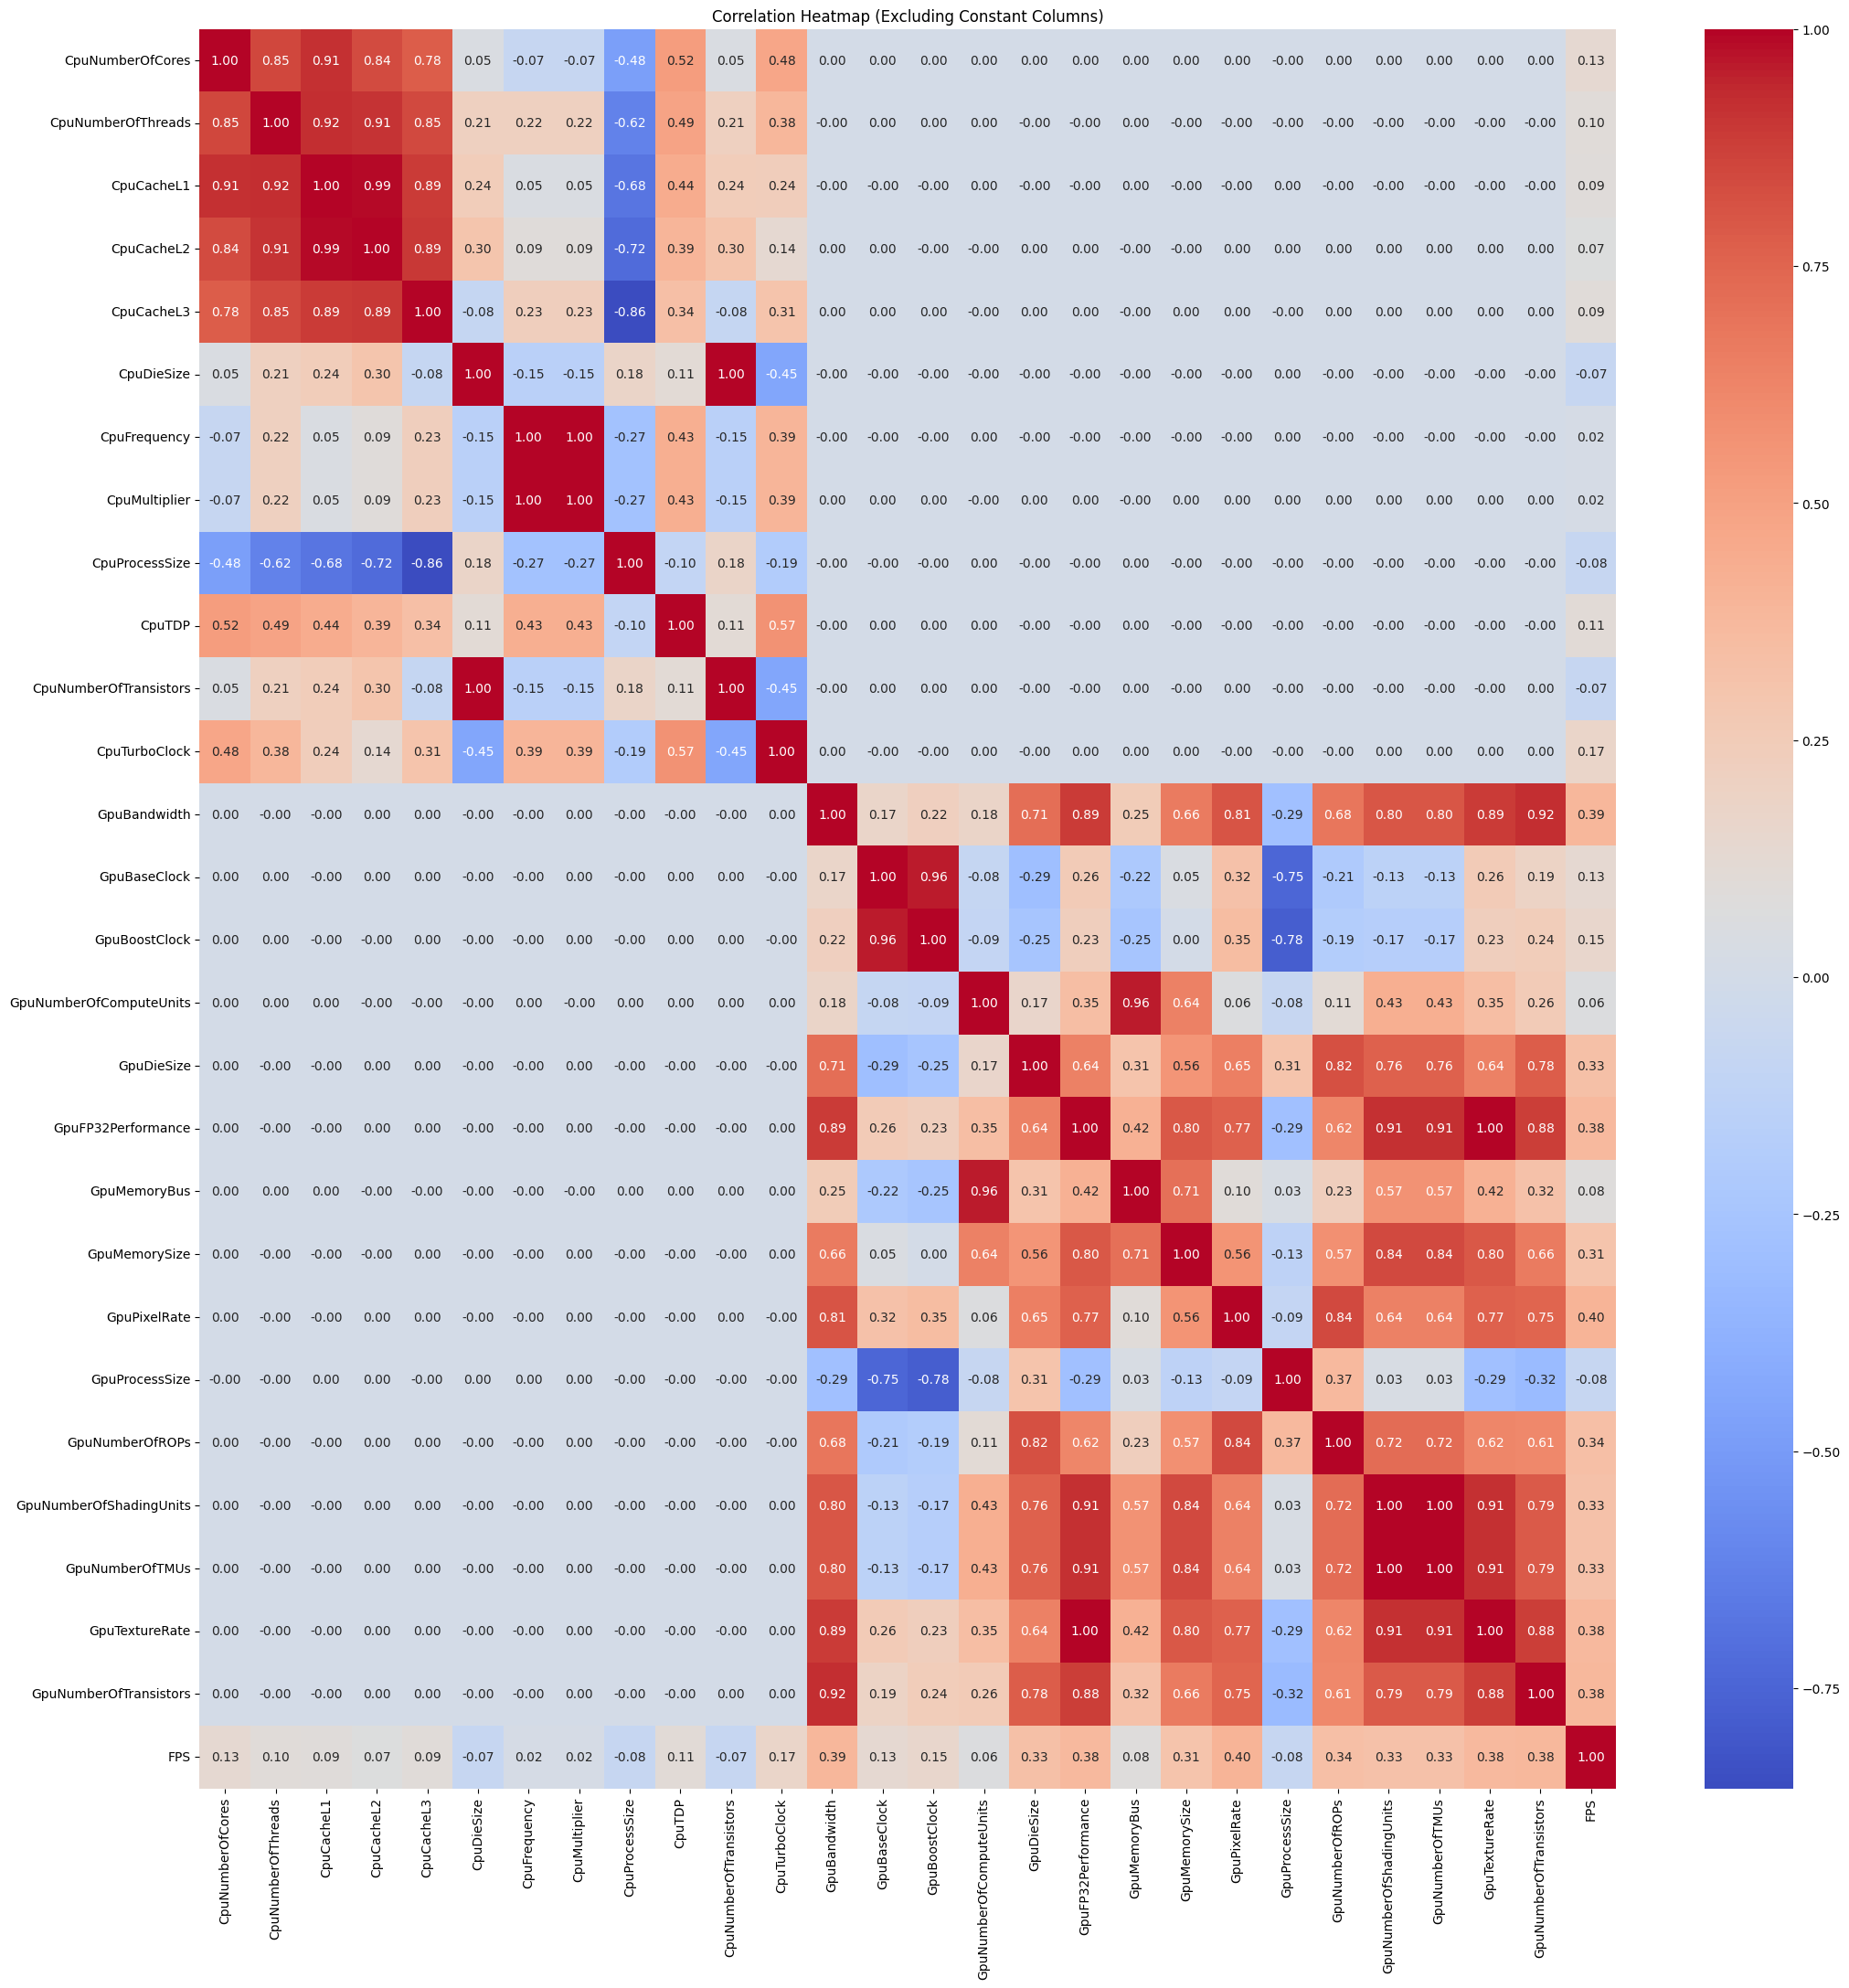

In [13]:
constant_cols = [col for col in numerical_cols if df[col].nunique() == 1]

# Exclude constant columns from numerical_cols for correlation calculation
filtered_numerical_cols = [col for col in numerical_cols if col not in constant_cols]

corr = df[filtered_numerical_cols].corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Excluding Constant Columns)')
plt.show()

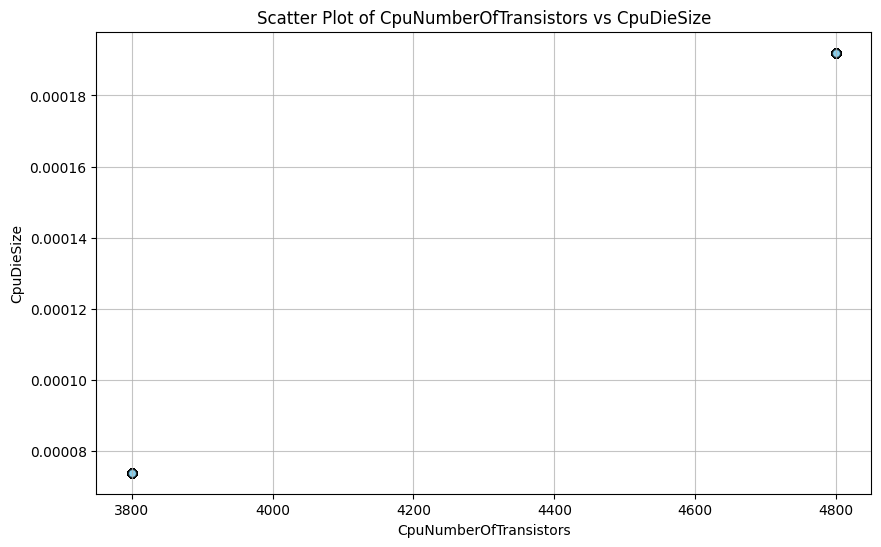

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df["CpuNumberOfTransistors"], df["CpuDieSize"], alpha=0.5, color="skyblue", edgecolors="black")
plt.title('Scatter Plot of CpuNumberOfTransistors vs CpuDieSize')
plt.xlabel('CpuNumberOfTransistors')
plt.ylabel('CpuDieSize')
plt.grid(axis='both', alpha=0.75)
plt.show()

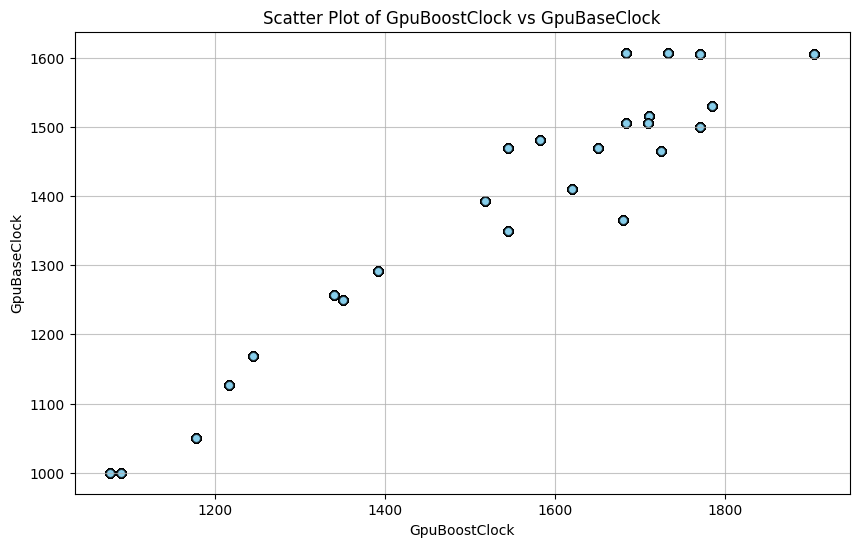

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df["GpuBoostClock"], df["GpuBaseClock"], alpha=0.5, color="skyblue", edgecolors="black")
plt.title('Scatter Plot of GpuBoostClock vs GpuBaseClock')
plt.xlabel('GpuBoostClock')
plt.ylabel('GpuBaseClock')
plt.grid(axis='both', alpha=0.75)
plt.show()

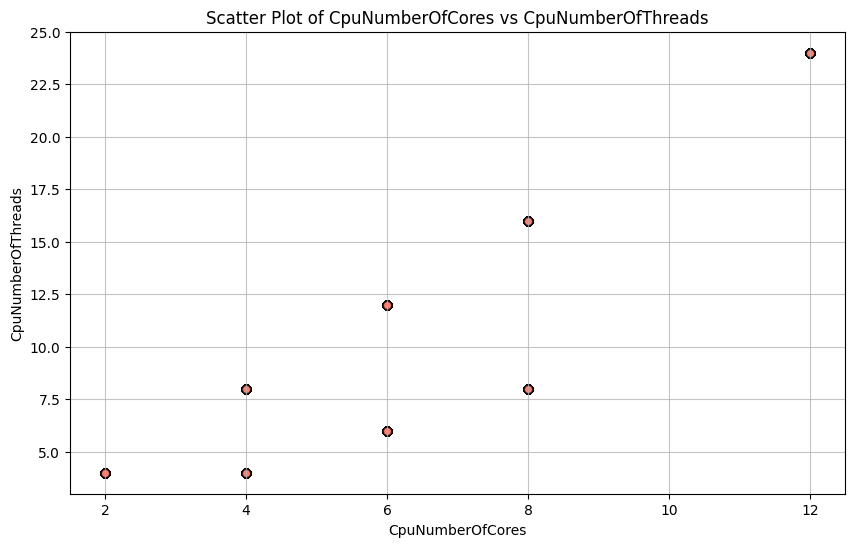

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df["CpuNumberOfCores"], df["CpuNumberOfThreads"], alpha=0.5, color="salmon", edgecolors="black")
plt.title('Scatter Plot of CpuNumberOfCores vs CpuNumberOfThreads')
plt.xlabel('CpuNumberOfCores')
plt.ylabel('CpuNumberOfThreads')
plt.grid(axis='both', alpha=0.75)
plt.show()

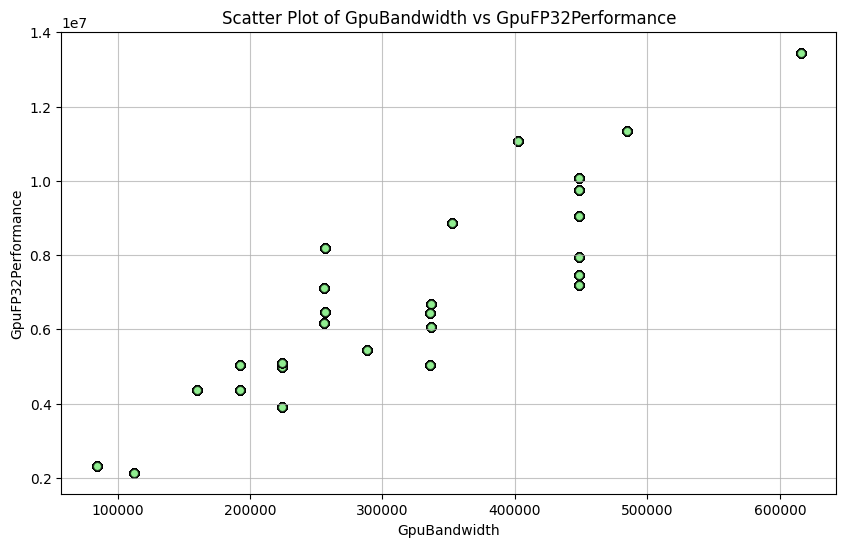

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df["GpuBandwidth"], df["GpuFP32Performance"], alpha=0.5, color="lightgreen", edgecolors="black")
plt.title('Scatter Plot of GpuBandwidth vs GpuFP32Performance')
plt.xlabel('GpuBandwidth')
plt.ylabel('GpuFP32Performance')
plt.grid(axis='both', alpha=0.75)
plt.show()

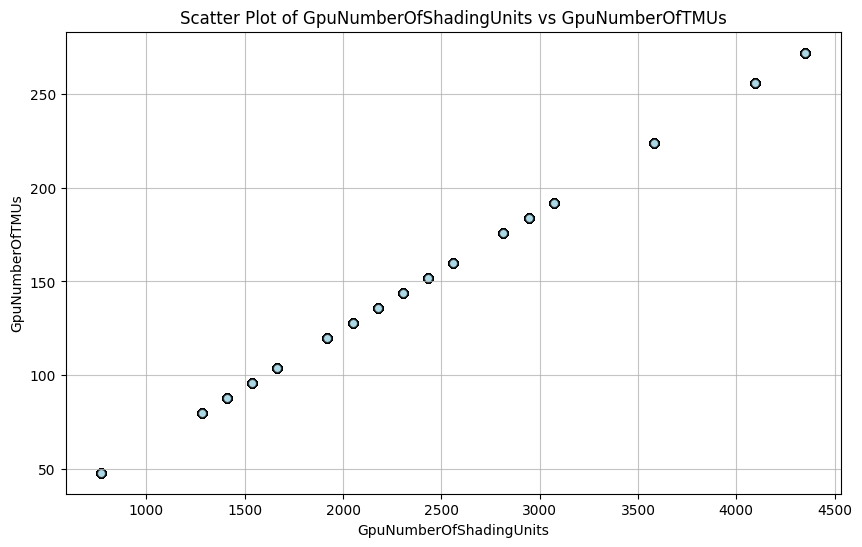

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df["GpuNumberOfShadingUnits"], df["GpuNumberOfTMUs"], alpha=0.5, color="lightblue", edgecolors="black")
plt.title('Scatter Plot of GpuNumberOfShadingUnits vs GpuNumberOfTMUs')
plt.xlabel('GpuNumberOfShadingUnits')
plt.ylabel('GpuNumberOfTMUs')
plt.grid(axis='both', alpha=0.75)
plt.show()

**Outlier Detection**

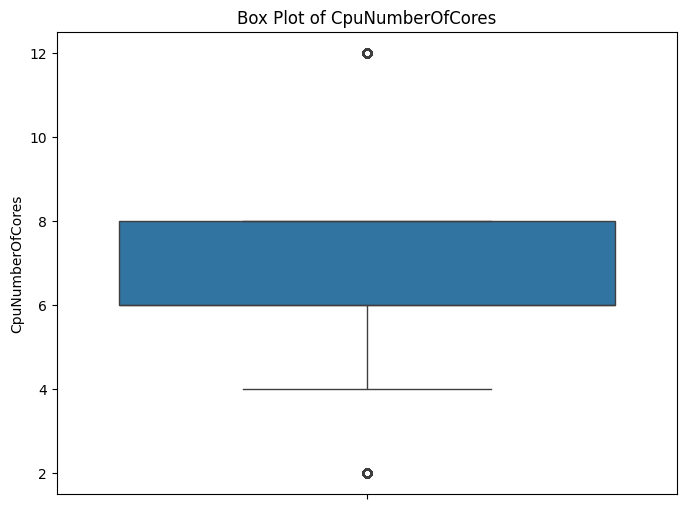

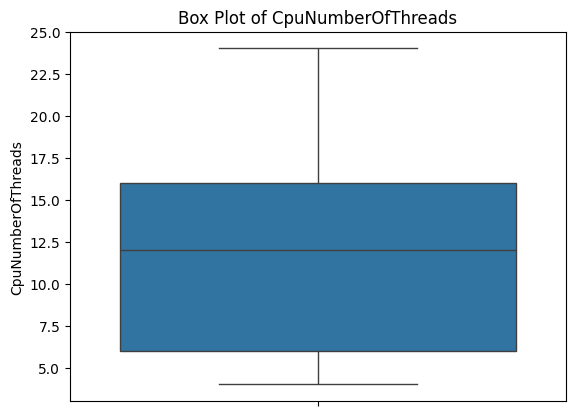

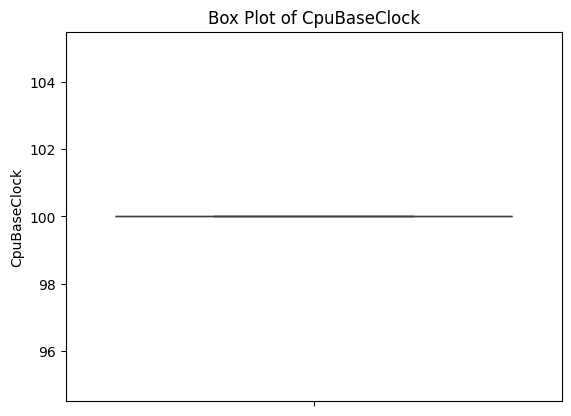

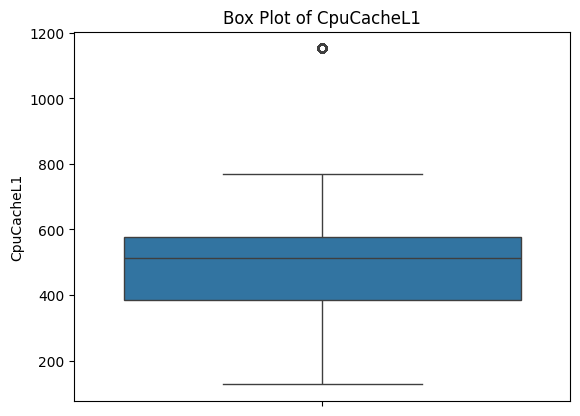

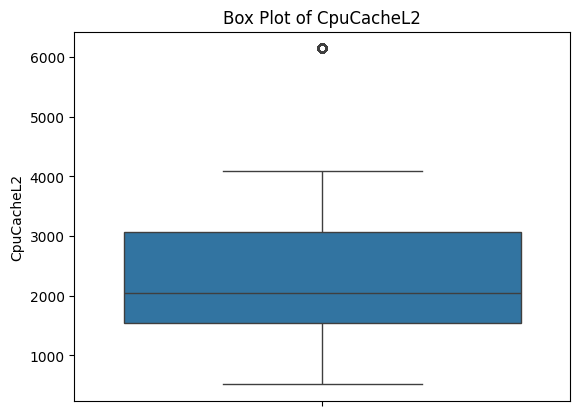

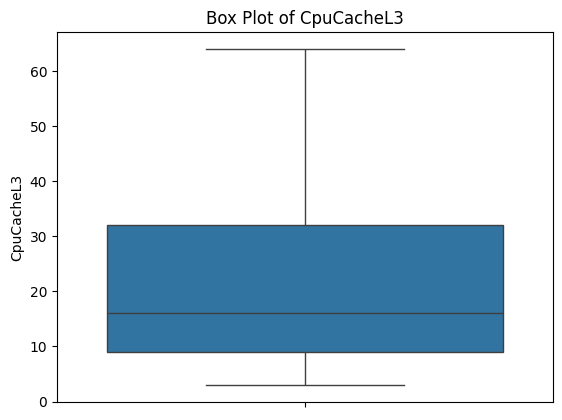

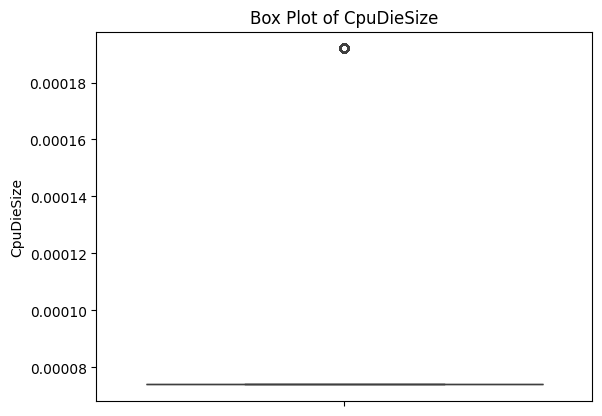

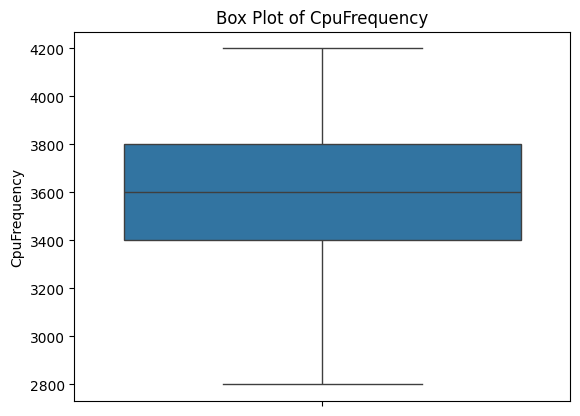

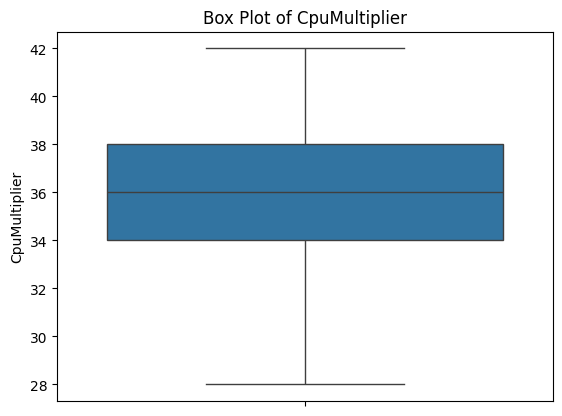

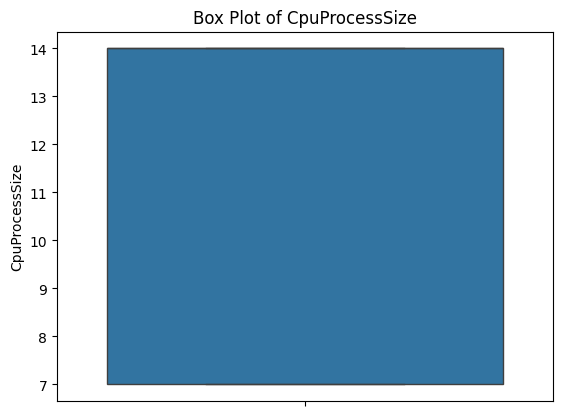

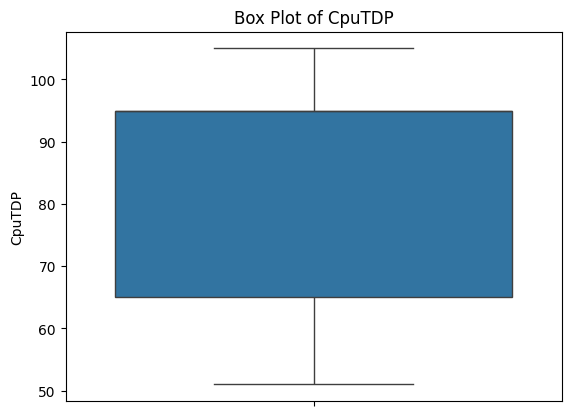

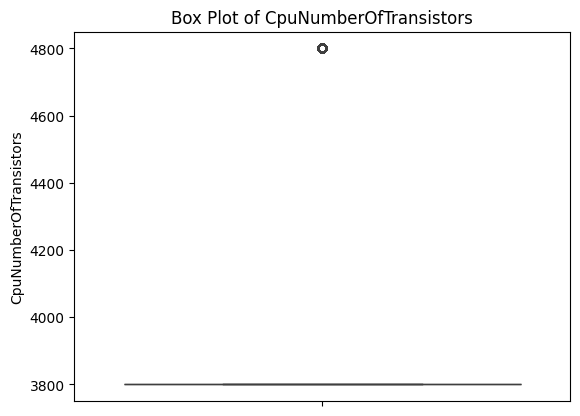

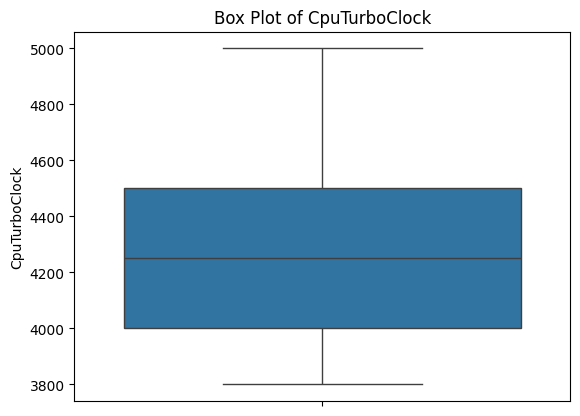

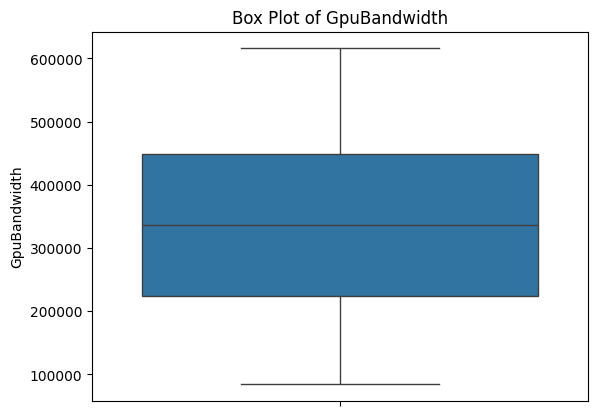

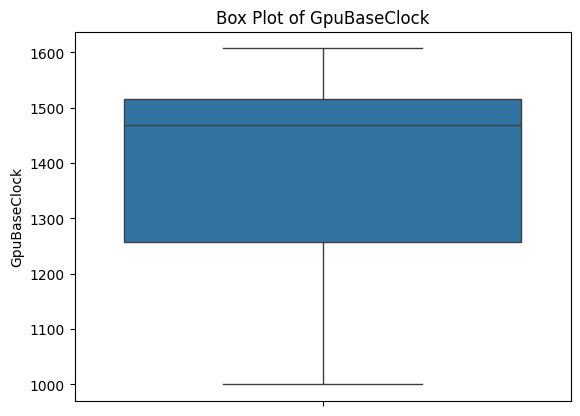

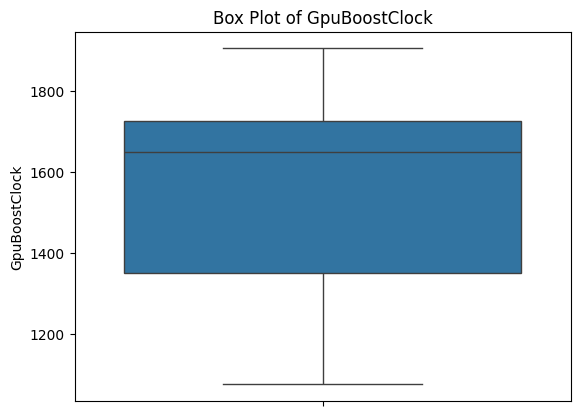

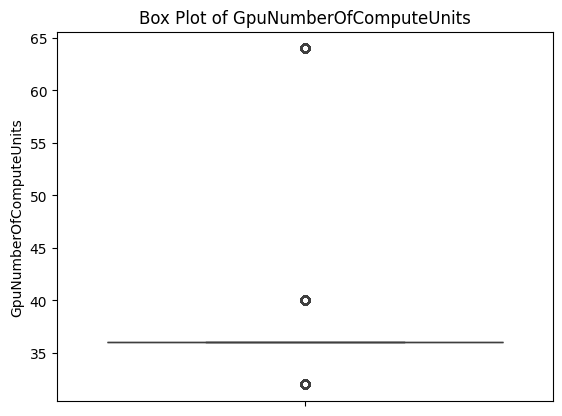

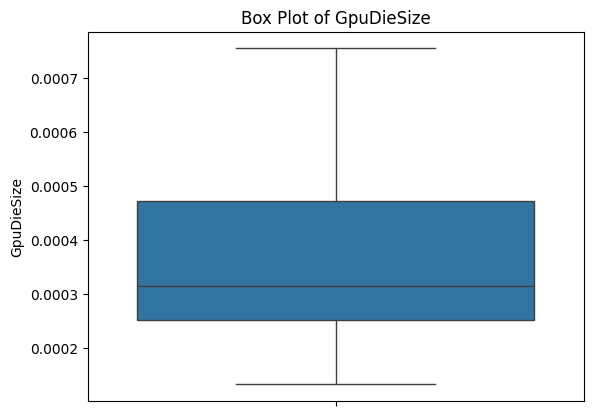

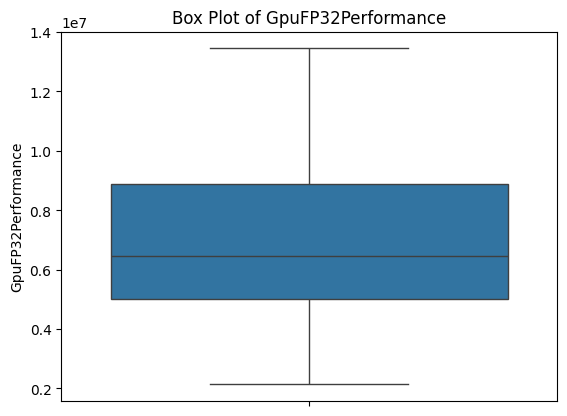

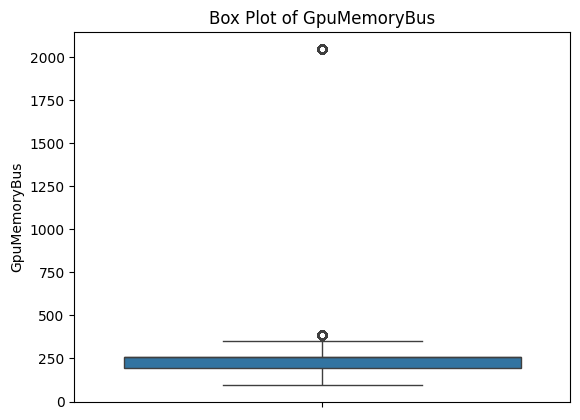

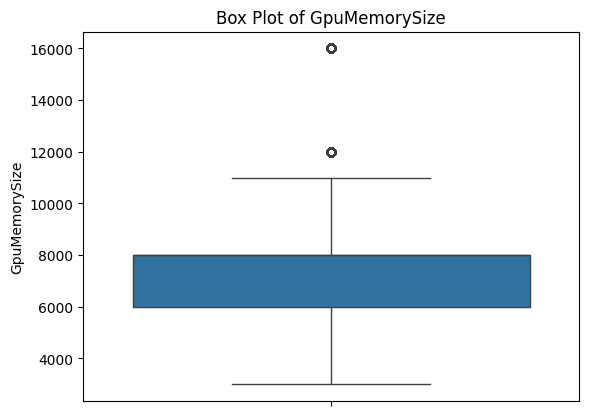

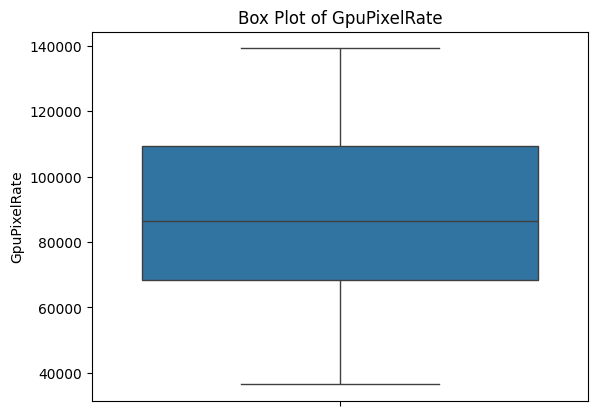

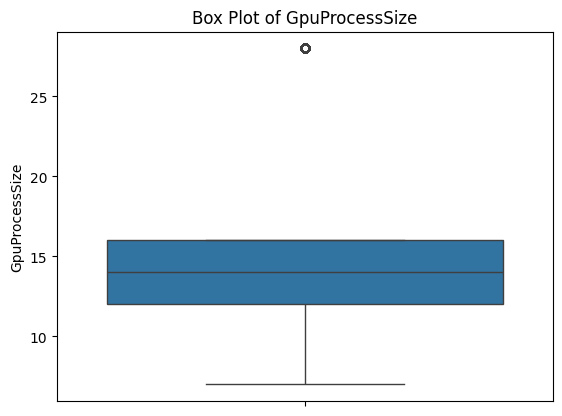

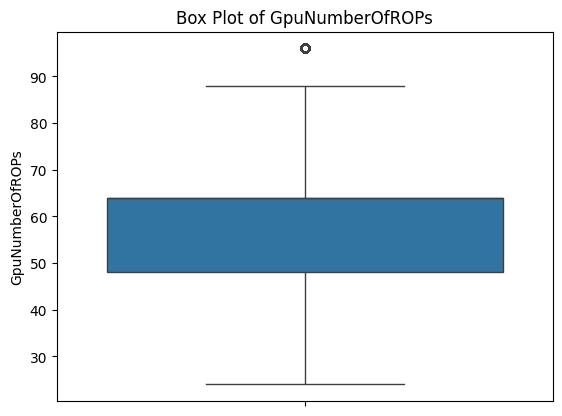

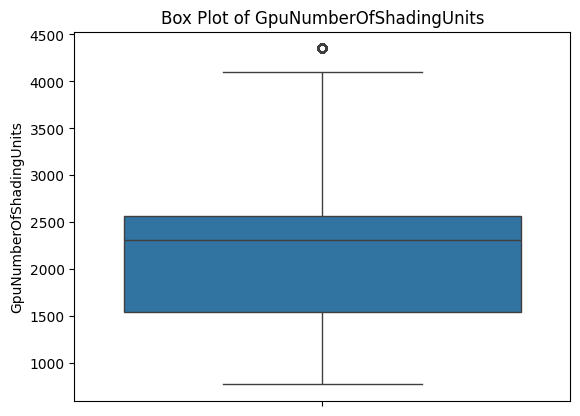

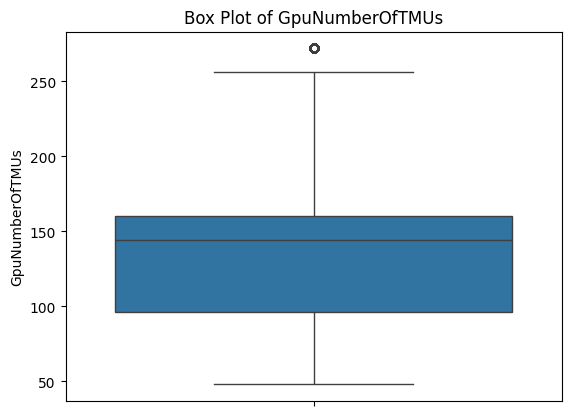

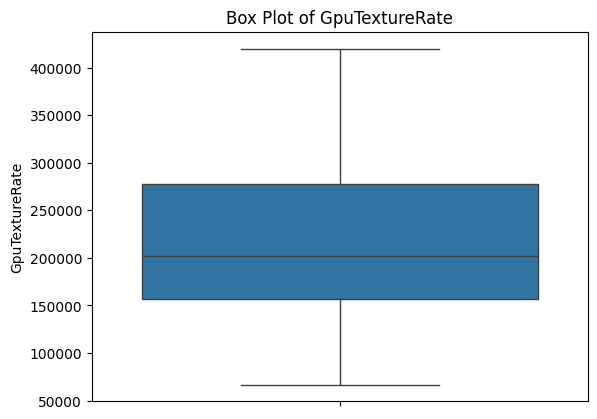

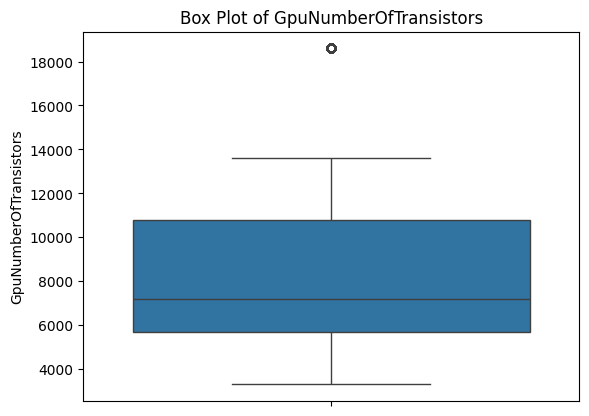

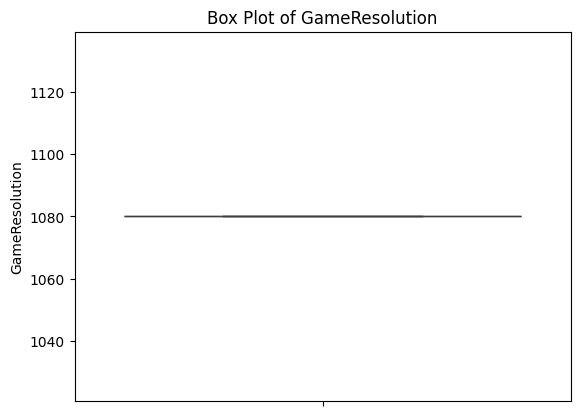

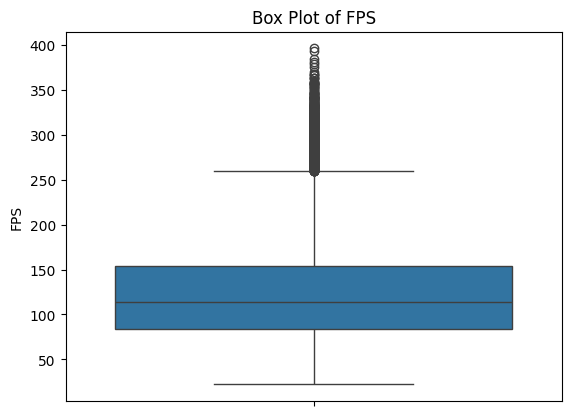

In [20]:
plt.figure(figsize=(8, 6))
for col in numerical_cols:
  sns.boxplot(data=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xticks(rotation=45)
  plt.show()

In [21]:
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

outlier_counts = {}
for col in filtered_numerical_cols:
    num_outliers = count_outliers_iqr(df, col)
    outlier_counts[col] = num_outliers

outlier_df = pd.DataFrame(outlier_counts.items(), columns=['Column', 'OutlierCount'])
display(outlier_df)

,Column,OutlierCount
0,CpuNumberOfCores,2592
1,CpuNumberOfThreads,0
2,CpuCacheL1,1296
3,CpuCacheL2,1296
4,CpuCacheL3,0
5,CpuDieSize,5184
6,CpuFrequency,0
7,CpuMultiplier,0
8,CpuProcessSize,0
9,CpuTDP,0


In [22]:
outlier_col = outlier_df[outlier_df['OutlierCount'] > 0]['Column'].tolist()
print("Columns with outliers:")
print(outlier_col)

Columns with outliers:
['CpuNumberOfCores', 'CpuCacheL1', 'CpuCacheL2', 'CpuDieSize', 'CpuNumberOfTransistors', 'GpuNumberOfComputeUnits', 'GpuMemoryBus', 'GpuMemorySize', 'GpuProcessSize', 'GpuNumberOfROPs', 'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs', 'GpuNumberOfTransistors', 'FPS']


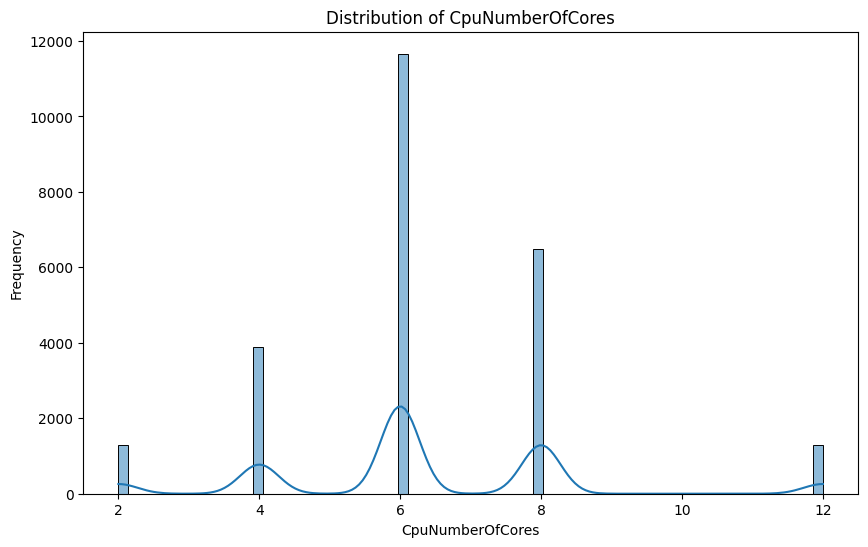

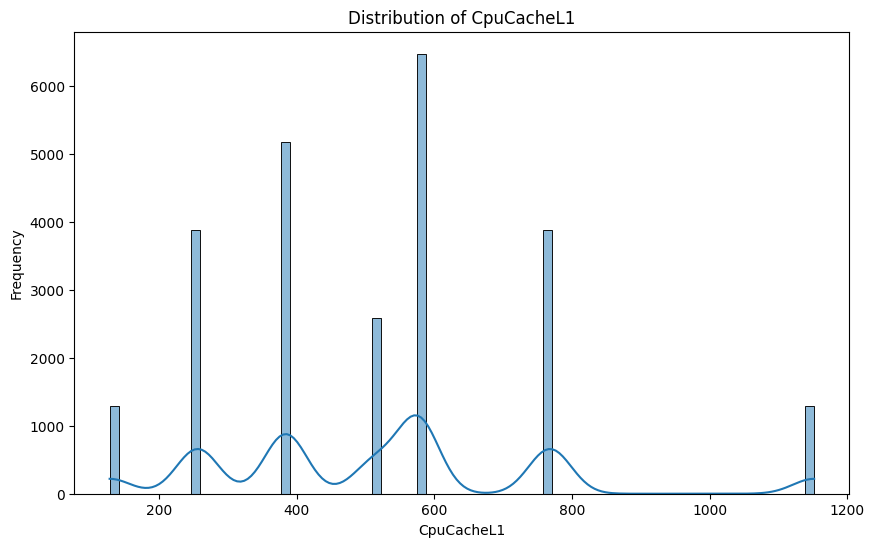

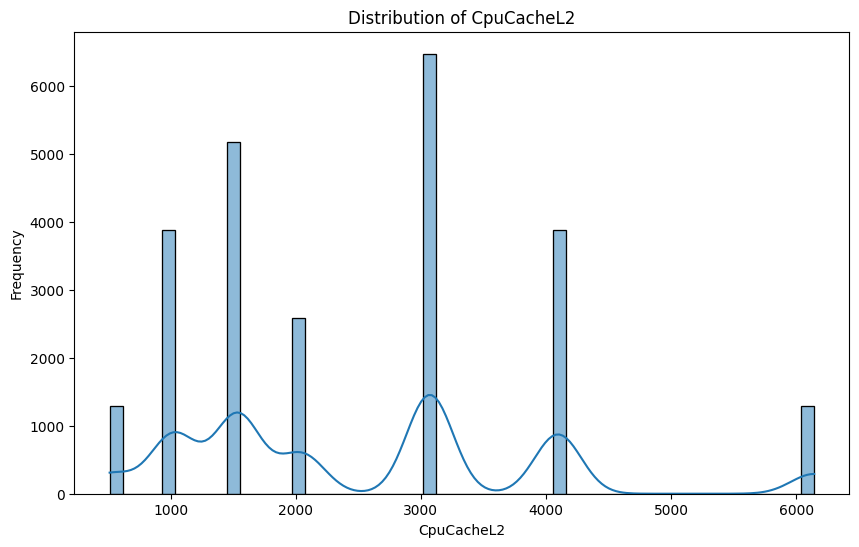

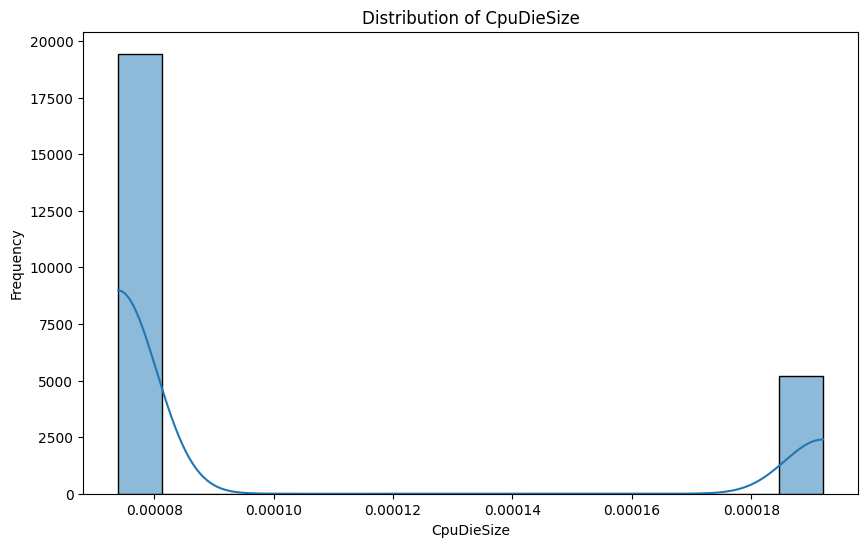

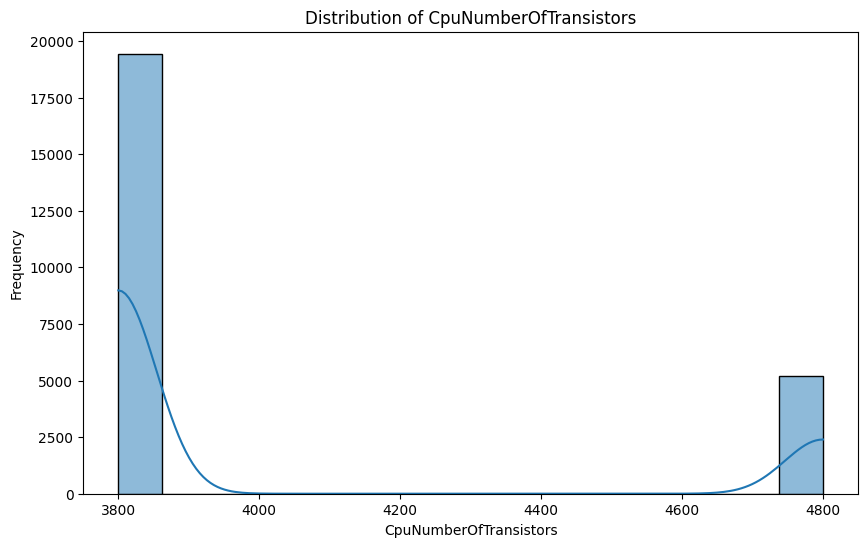

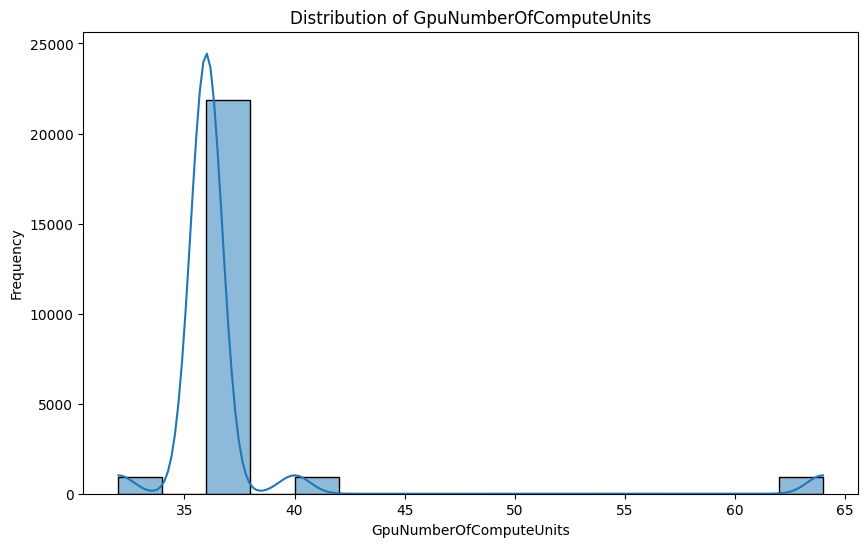

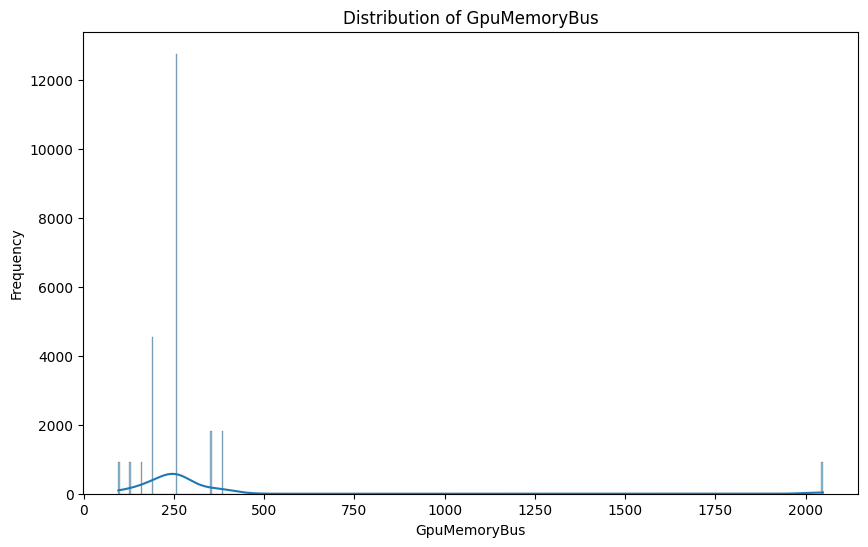

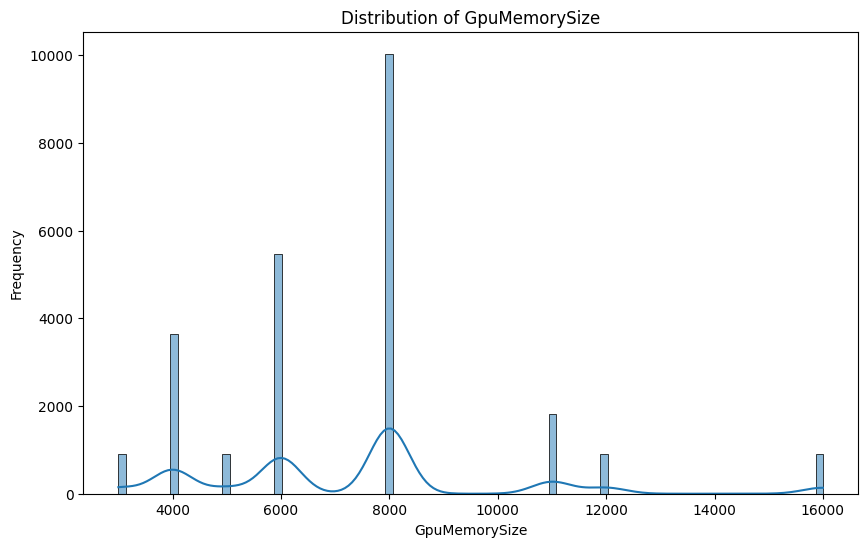

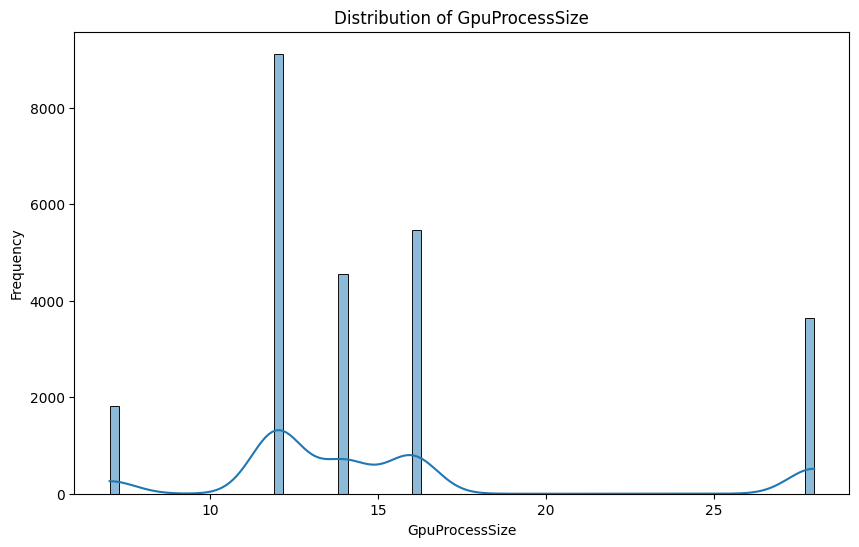

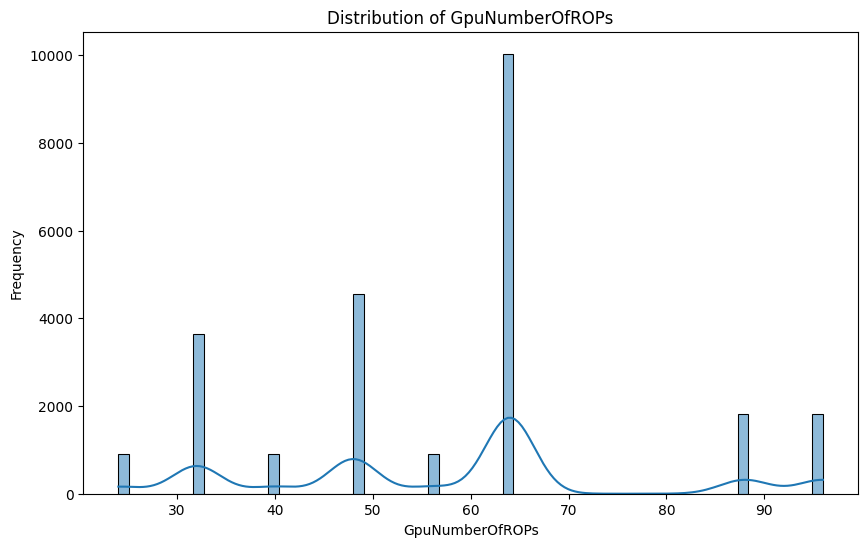

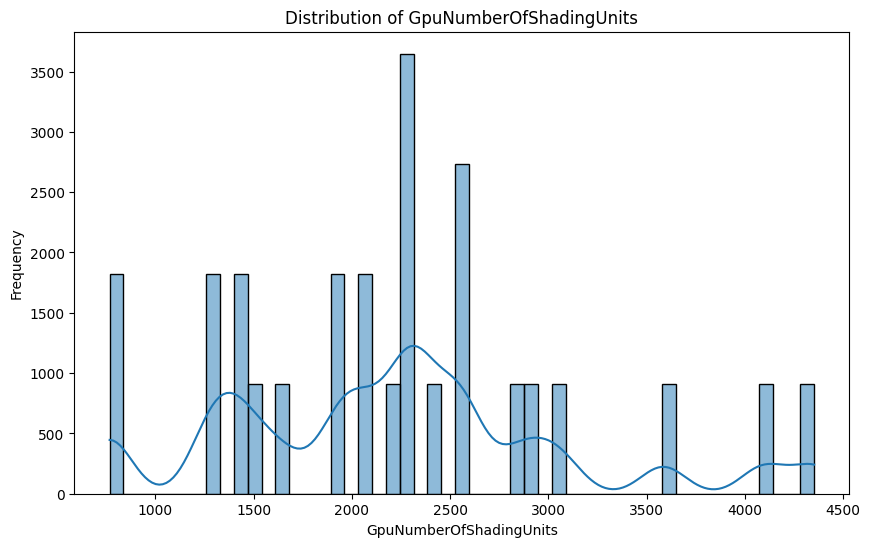

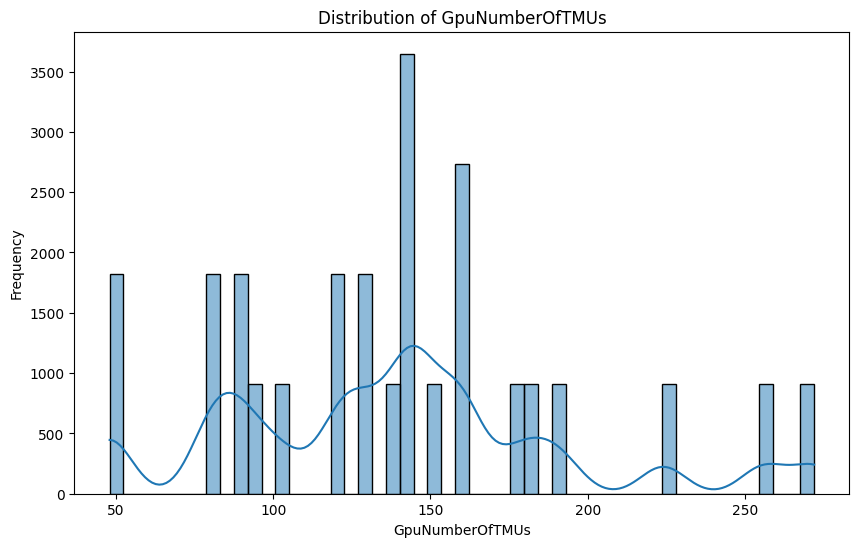

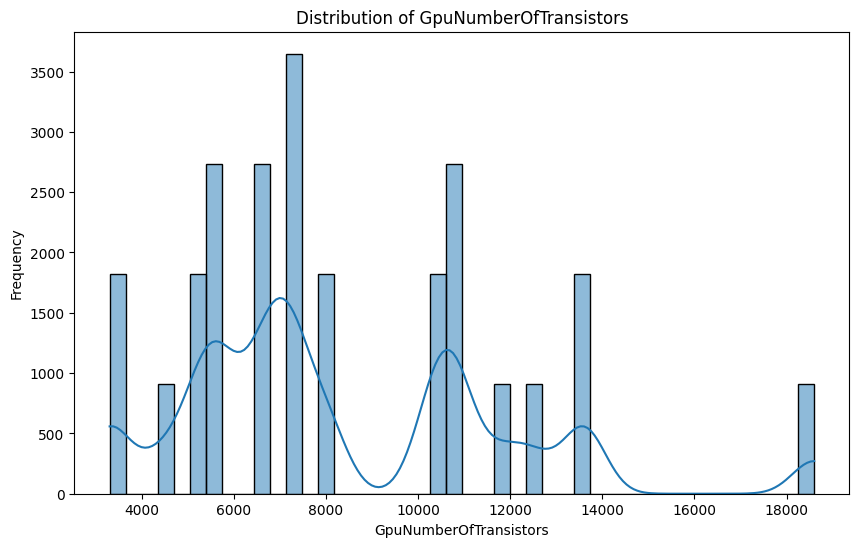

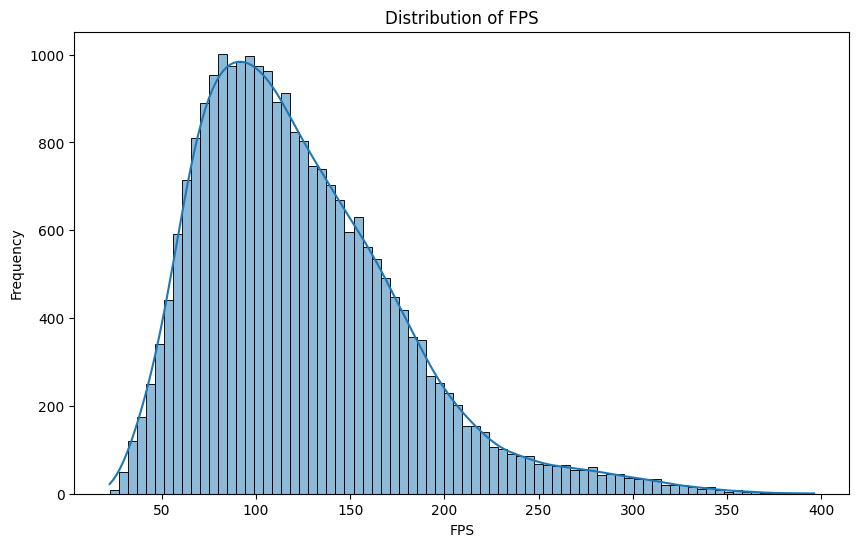

In [23]:
for col in outlier_col:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

1. **Scatter Plot of CpuNumberOfTransistors vs CpuDieSize Observation:** This ***bimodal distribution*** suggests that there are two main groups of CPUs in the dataset, likely representing different generations, architectures, or product lines.
2. **Scatter Plot of GpuBoostClock vs GpuBaseClock Observation:** The plot exhibits a ***very strong linear positive correlation***. Most data points fall close to a straight line, indicating that GpuBoostClock values tend to increase proportionally with GpuBaseClock values.
3. **Scatter Plot of CpuNumberOfCores vs CpuNumberOfThreads Observation:** This plot displays a ***strong positive linear relationship***, but it's characterized by discrete clusters of points. For example, 2 cores often correspond to 4 threads, 4 cores to 8 threads, 6 cores to 6 or 12 threads, and 8 cores to 16 threads.  
4. **Scatter Plot of GpuBandwidth vs GpuFP32Performance Observation:** A clear ***positive linear trend*** is visible, indicating that as GpuBandwidth increases, GpuFP32Performance generally increases. However, there is some vertical spread in the data points for similar bandwidth values, suggesting that other factors also influence FP32 performance.
5. **Scatter Plot of GpuNumberOfShadingUnits vs GpuNumberOfTMUs Observation:** This plot shows an ***extremely strong positive linear relationship.*** The data points are tightly aligned along a diagonal line, exhibiting very little scatter.

# Task
Here is a summary of the distribution types for each of the 14 outlier columns:

*   **CpuNumberOfCores:** Multimodal distribution, with distinct peaks at several core counts (e.g., 2, 4, 6, 8, 12).
*   **CpuCacheL1:** Multimodal distribution, showing multiple peaks at different cache sizes.
*   **CpuCacheL2:** Multimodal distribution, exhibiting several distinct peaks corresponding to various cache sizes.
*   **CpuDieSize:** Bimodal distribution, with two prominent peaks (around 0.000075 and 0.00019).
*   **CpuNumberOfTransistors:** Bimodal distribution, showing two distinct peaks (around 3800 and 4800).
*   **GpuNumberOfComputeUnits:** Multimodal distribution, featuring a very dominant peak around 36 and smaller peaks at other values (e.g., 32, 40, 64).
*   **GpuMemoryBus:** Multimodal distribution, with multiple distinct peaks at different memory bus widths.
*   **GpuMemorySize:** Multimodal distribution, indicating several distinct groups of GPU memory sizes.
*   **GpuProcessSize:** Multimodal distribution, displaying multiple peaks at various process sizes.
*   **GpuNumberOfROPs:** Multimodal distribution, characterized by several distinct peaks representing different numbers of ROPs.
*   **GpuNumberOfShadingUnits:** Multimodal distribution, showing multiple peaks at various shading unit counts.
*   **GpuNumberOfTMUs:** Multimodal distribution, with several distinct peaks at different TMU counts.
*   **GpuNumberOfTransistors:** Multimodal distribution, exhibiting multiple peaks at various transistor counts.
*   **FPS:** Unimodal distribution, with a single dominant peak around 100-110 and a tail extending to higher FPS values.

In [24]:
unimodal_cols = ['FPS']
bimodal_cols = ['CpuDieSize', 'CpuNumberOfTransistors']
multimodal_cols = [
    'CpuNumberOfCores',
    'CpuCacheL1',
    'CpuCacheL2',
    'GpuNumberOfComputeUnits',
    'GpuMemoryBus',
    'GpuMemorySize',
    'GpuProcessSize',
    'GpuNumberOfROPs',
    'GpuNumberOfShadingUnits',
    'GpuNumberOfTMUs',
    'GpuNumberOfTransistors'
]

print("Unimodal Columns:", unimodal_cols)
print("Bimodal Columns:", bimodal_cols)
print("Multimodal Columns:", multimodal_cols)

Unimodal Columns: ['FPS']
Bimodal Columns: ['CpuDieSize', 'CpuNumberOfTransistors']
Multimodal Columns: ['CpuNumberOfCores', 'CpuCacheL1', 'CpuCacheL2', 'GpuNumberOfComputeUnits', 'GpuMemoryBus', 'GpuMemorySize', 'GpuProcessSize', 'GpuNumberOfROPs', 'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs', 'GpuNumberOfTransistors']


# Outlier Treatment

**Objective:** To handle extreme values in multimodal hardware specifications (e.g., Server CPUs, High-end GPUs) without causing significant data loss or introducing selection bias.

**1. Log Transformation:**
Applied np.log1p (Logarithmic Transformation) to all continuous hardware columns to compress the scale of the data. This reduced the skewness caused by the vast price/performance gap between budget and high-end components.

In [25]:
import numpy as np

print("Applying log transformation (np.log1p) to multimodal columns...")

for col in multimodal_cols:
    # Check if there are any non-positive values before applying log transformation
    if (df[col] <= 0).any():
        print(f"Warning: Column '{col}' contains non-positive values. Using np.log1p.")

    # Apply log1p transformation to handle potential zeros
    df[col] = np.log1p(df[col])

print("Log transformation applied to multimodal columns.")

# Display the head of the DataFrame to show transformed values
display(df[multimodal_cols].head())

Applying log transformation (np.log1p) to multimodal columns...
Log transformation applied to multimodal columns.


,CpuNumberOfCores,CpuCacheL1,CpuCacheL2,GpuNumberOfComputeUnits,GpuMemoryBus,GpuMemorySize,GpuProcessSize,GpuNumberOfROPs,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuNumberOfTransistors
0,2.197225,6.240276,7.625107,3.610918,5.866468,9.305741,2.564949,4.488636,8.378621,5.609472,9.830971
1,2.197225,6.240276,7.625107,3.610918,5.866468,9.305741,2.564949,4.488636,8.378621,5.609472,9.830971
2,1.945910,5.953243,7.337588,3.610918,5.866468,9.305741,2.564949,4.488636,8.378621,5.609472,9.830971
3,1.609438,5.549076,6.932448,3.610918,5.866468,9.305741,2.564949,4.488636,8.378621,5.609472,9.830971
4,1.945910,5.953243,7.337588,3.610918,5.866468,9.305741,2.564949,4.488636,8.378621,5.609472,9.830971


In [26]:
outlier_counts_after_log_transform = {}
for col in outlier_col:
    num_outliers = count_outliers_iqr(df, col)
    outlier_counts_after_log_transform[col] = num_outliers

outlier_df_after_log_transform = pd.DataFrame(outlier_counts_after_log_transform.items(), columns=['Column', 'OutlierCount'])
display(outlier_df_after_log_transform)

,Column,OutlierCount
0,CpuNumberOfCores,1296
1,CpuCacheL1,2592
2,CpuCacheL2,1296
3,CpuDieSize,5184
4,CpuNumberOfTransistors,5184
5,GpuNumberOfComputeUnits,2736
6,GpuMemoryBus,1824
7,GpuMemorySize,1824
8,GpuProcessSize,5472
9,GpuNumberOfROPs,912


**3 columns showed, 0 outlier after transformation.**

**2. Selective Capping (Winsorization):**
* Identified 10 Hardware Columns (e.g., CpuNumberOfCores, CpuDieSize) exhibiting "tiered" outlier clusters.
* Instead of removing these rows (which would delete ~50% of the dataset), we applied Percentile Capping.
* Strategy: Values were clipped at the 5th (Lower) and 95th (Upper) percentiles. This preserves the data point for the model while neutralizing its ability to skew statistical calculations.

**3. Target Variable Preservation:**
The target column ***"FPS"***  was excluded from capping after a manual audit confirmed that the high values (Max: ~396 FPS) represented valid competitive gaming performance, not data errors.

--- FPS Statistics ---
count    24624.000000
mean       123.959369
std         54.610080
min         22.200000
25%         83.600000
50%        114.300000
75%        154.100000
max        396.400000
Name: FPS, dtype: float64

--- Top 20 Highest FPS Values ---
[396.4 392.9 384.1 380.7 378.7 375.2 369.9 368.1 367.  367.  363.7 363.7
 363.6 360.1 358.4 358.3 357.5 357.4 356.9 356.7]

--- Bottom 10 Lowest FPS Values ---
[22.2 23.1 24.9 25.6 26.  26.  26.1 26.6 26.9 27.1]


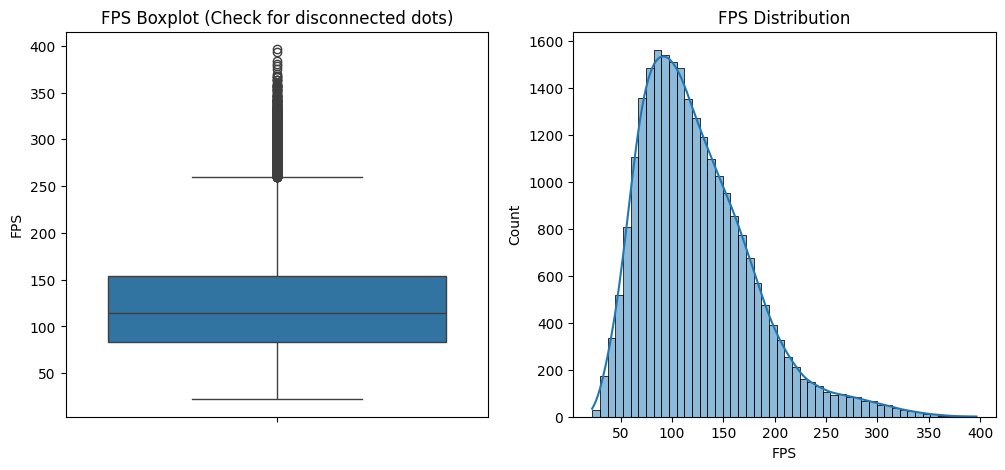

In [27]:
# 1. Basic Statistics
print("--- FPS Statistics ---")
print(df['FPS'].describe())

# 2. The "Extreme" Values
print("\n--- Top 20 Highest FPS Values ---")
print(df['FPS'].nlargest(20).values)

print("\n--- Bottom 10 Lowest FPS Values ---")
print(df['FPS'].nsmallest(10).values)

# 3. Visual Inspection
plt.figure(figsize=(12, 5))

# Boxplot to see the "outliers" clearly
plt.subplot(1, 2, 1)
sns.boxplot(y=df['FPS'])
plt.title("FPS Boxplot (Check for disconnected dots)")

# Distribution Plot to see the shape
plt.subplot(1, 2, 2)
sns.histplot(df['FPS'], bins=50, kde=True)
plt.title("FPS Distribution")

plt.show()

In [28]:
import pandas as pd
import numpy as np

# 1. Define the strategy lists
cols_to_cap = [
    'CpuNumberOfCores', 'CpuCacheL1', 'CpuCacheL2', 'CpuDieSize',
    'CpuNumberOfTransistors', 'GpuNumberOfComputeUnits', 'GpuMemoryBus',
    'GpuMemorySize', 'GpuProcessSize', 'GpuNumberOfROPs'
]

# 2. Define the Capping Function
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_limit = series.quantile(lower_quantile)
    upper_limit = series.quantile(upper_quantile)
    return series.clip(lower=lower_limit, upper=upper_limit)

# 3. Apply Capping ONLY to the 10 hardware columns
# We are NOT touching 'FPS' or the other 3 clean columns
for col in cols_to_cap:
    df[col] = cap_outliers(df[col])

print("✅ Outlier treatment complete.")
print(f"Total rows remaining: {len(df)} (100% Data Retention)")

✅ Outlier treatment complete.
Total rows remaining: 24624 (100% Data Retention)


In [29]:
# 1. Ensure the counting function is defined
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

# 2. Re-check the counts
outlier_counts_final = {}

# Make sure 'outlier_col' contains the 10 columns you just capped
for col in outlier_col:
    if col in df.columns:
        num_outliers = count_outliers_iqr(df, col)
        outlier_counts_final[col] = num_outliers

# 3. Create DataFrame and Sort
outlier_df_final = pd.DataFrame(outlier_counts_final.items(), columns=['Column', 'OutlierCount'])

# 4. Display
print("--- Final Outlier Check (After Capping) ---")
display(outlier_df_final)

--- Final Outlier Check (After Capping) ---


,Column,OutlierCount
0,CpuNumberOfCores,1296
1,CpuCacheL1,2592
2,CpuCacheL2,1296
3,CpuDieSize,5184
4,CpuNumberOfTransistors,5184
5,GpuNumberOfComputeUnits,1824
6,GpuMemoryBus,0
7,GpuMemorySize,0
8,GpuProcessSize,5472
9,GpuNumberOfROPs,0


**Verification:** Post-processing checks confirmed that while strict IQR methods still flag the capped values as statistical outliers, the absolute maximum values (e.g., Log-transformed Max Cores $\approx$ 2.56) are now stable and bounded, ensuring model safety.

#Conclusion
Dataset is now:
* **Target Variable (FPS) Check:** Max FPS is 396, which is within realistic bounds. No target capping required, preserving true high-end performance data.
* 100% Intact (No rows lost).
* Ready for Modeling.
* CLEAN & READY ✅